In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/Fraud.csv") 

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

## **Summary of the Dataset:**
        
        This dataset represents financial transaction details with key features and flags for identifying fraudulent activity. Below is a breakdown of the features and insights:


## Column Description:

    step:-> maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
    
    type:-> this is transaction types (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER).    
    
    amount:-> amount of the transaction in local currency.
    
    nameOrig:-> customer_id of who started the transaction
    
    oldbalanceOrg:-> initial balance before the transaction in local currency
    
    newbalanceOrig:-> new balance after the transaction in local currency    
    
    nameDest:-> customer_id of who is the recipient of the transaction
    
    oldbalanceDest:-> initial balance (in local currency) recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
    
    newbalanceDest:-> new balance (in local currency) recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
    
    isFraud:-> This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
    
    isFlaggedFraud:-> The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## **Issue with the data set :**

    1. every column has right data type assigned
    2. there is also no duplicate rows
    3. there is also no null values present

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Key Statistics and Observations

1. Transaction Volume:
    The dataset contains 6,362,620 transactions, representing a substantial number of financial activities.

2. Step:- Represents the time step of transactions.                                                                                        
        Mean: 243.40, indicating the average step index.                                                                               
        Range: From 1 (minimum) to 743 (maximum), showing the extent of time periods covered.                                                  
4. Transaction Amount:                                                                                                                     
        Mean: 179,861.9, suggesting that the average transaction amount is relatively high.                                                
        Standard Deviation: 603,858.2, indicating significant variation in transaction sizes.                                              
        Range: From 0 (minimum) to 92,445,520, showing the presence of both small and extremely large transactions.                            
6. Originating Account Balances:                                                                                                           
    Old Balance (oldbalanceOrg):                                                                                                           
        Mean: 833,883.1, highlighting the average balance before transactions.                                                             
        Maximum: 59,585,040, indicating a substantial balance in some accounts.                                                            
        New Balance (newbalanceOrig):                                                                                                      
        Mean: 855,113.7, slightly higher than the old balance.                                       
7. Destination Account Balances:                                                                                                           
    Old Balance (oldbalanceDest):                                                                                                          
        Mean: 1,100,702, indicating significant balances in destination accounts.                                                          
        Maximum: 356,015,920, showing very high balances for certain transactions.                                                         
        New Balance (newbalanceDest):                                                                                                      
        Mean: 1,224,996, showing increased balances after transactions, likely due to deposits or transfers.                               
8. Fraud Indicators:                                                                                                                       
        isFraud:                                                                                                                           
            Mean: 0.00129 (approximately 0.13%), indicating that only a small percentage of transactions are fraudulent.                   
            Range: From 0 (non-fraudulent) to 1 (fraudulent).                                                                                  
10. isFlaggedFraud:                                                                                                                        
        Mean: 0.0000025, suggesting that the system flagged a minuscule fraction of transactions for fraud.                                
11. Distribution Characteristics:                                                                                                          
    The 25th, 50th (median), and 75th percentiles show that most transactions involve relatively moderate amounts and balances, but there are notable outliers with extremely high values (as seen in the max values).




##   Insights for Analysis

1. Fraud Detection:                                                                                                                        
    The dataset is highly imbalanced, with very few fraudulent transactions. This calls for special handling techniques such as oversampling (e.g., SMOTE) or anomaly detection models.                                                                                    
   
2. Transaction Variability:                                                                                                                
    The high standard deviation in amount, oldbalanceOrg, and oldbalanceDest indicates the presence of diverse financial behaviors.        
3. Balance Validation:                                                                                                                     
    The relationship between oldbalanceOrg, newbalanceOrig, and amount should be analyzed to check for consistency and potential fraud patterns.                                                                                                                                  
4. Outlier Transactions:                                                                                                                   
    The maximum transaction amounts and balances may indicate large-scale business or highly unusual activities, which require further scrutiny.

## EDA on this data set to understand the data more and also to analysis the data 

Column Types:-

    step- numerical
    
    type- categorical
    
    amount- numerical
    
    nameOrig- mixed 
    
    oldbalanceOrg- numerical 
    
    newbalanceOrig- numerical
    
    nameDest- mixed 
    
    oldbalanceDest- numerical
    
    newbalanceDest- numerical 
    
    isFraud- numerical 
    
    isFlaggedFraud- numerical
    

## Univeriate Analysis

## For Step

<Axes: ylabel='Frequency'>

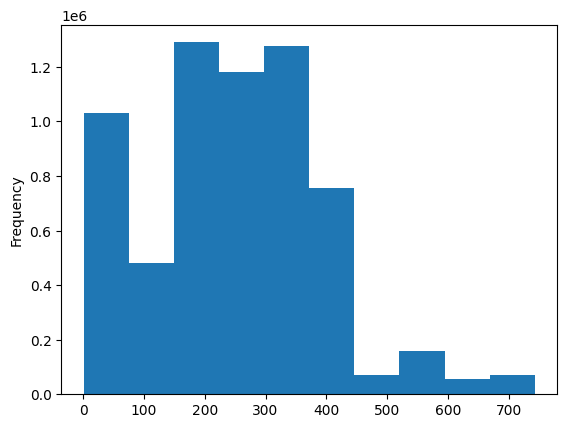

In [9]:
data['step'].plot(kind = 'hist')

#### The transactions are evenly distributed across the majority of time steps, with notable peaks observed around steps 150-450, indicating higher activity during that period. And also data is kind of normaly distributed

<Axes: ylabel='Density'>

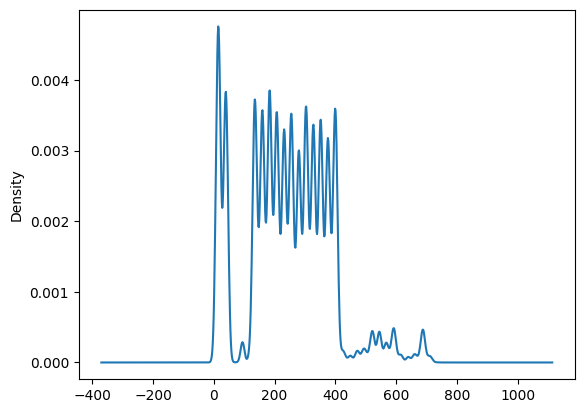

In [10]:
data['step'].plot(kind = 'kde')

<Axes: >

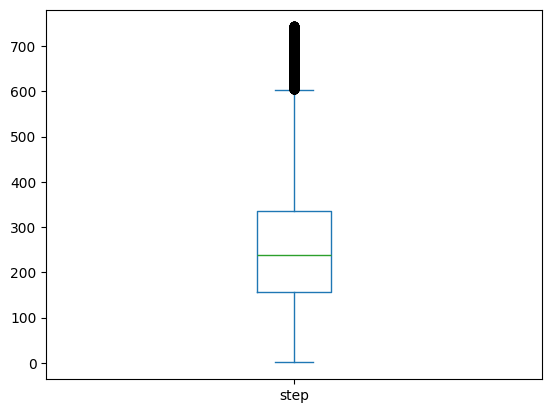

In [11]:
data['step'].plot(kind = 'box')

#### there is also some values which is realy far from median which values are greater then 600 

In [12]:
data[data['step'] > 600]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259047,601,PAYMENT,115.00,C396363347,50.00,0.00,M1137898995,0.00,0.00,0,0
6259048,601,PAYMENT,23302.85,C1505891415,0.00,0.00,M1672214987,0.00,0.00,0,0
6259049,601,PAYMENT,2180.34,C1957624179,39492.00,37311.66,M545781624,0.00,0.00,0,0
6259050,601,PAYMENT,1504.97,C1764634515,49660.00,48155.03,M1433921244,0.00,0.00,0,0
6259051,601,PAYMENT,4445.60,C1452402784,1612.00,0.00,M1228077565,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#### step greater then 600 also have fraud transaction and also in various types of transaction

### Conclusion
    most of the step is in range 150 to 450
    not normaly distributed there is sudden peaks
    step greater then 600 also have fraud transaction and also in various types of transaction

## For type column

In [13]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type'>

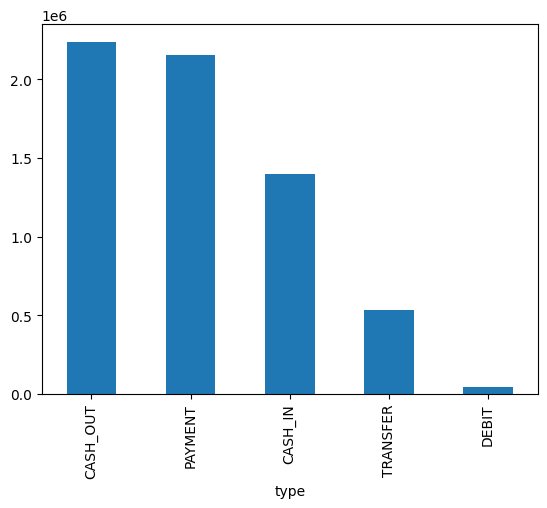

In [14]:
data['type'].value_counts().plot(kind='bar')

#### It can be easily seen that CASH_OUT is the most frequent transaction type, followed by PAYMENT, CASH_IN, TRANSFER, and DEBIT.

<Axes: ylabel='count'>

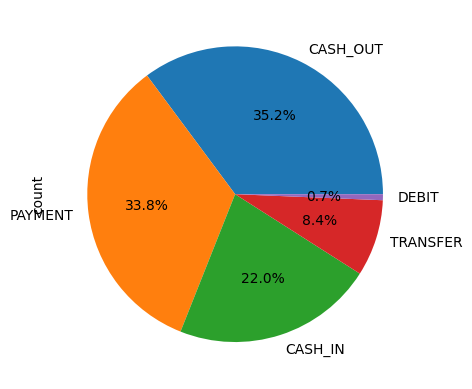

In [15]:
data['type'].value_counts().plot(kind='pie',autopct = '%0.1f%%')

    cash_out is in 35.2% transaction

    payment is in 33.8%

    cash_in is in 22%
    
    transfer is in 8.4%
    
    debit is in 0.7%

## for amount column

In [16]:
data['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

### General Observations
    Count: The dataset contains 6,362,620 transactions, reflecting a substantial volume of data.
    
    Mean: The average transaction amount is approximately 179,861.90 units, suggesting moderate to large transaction sizes.
    
    Median (50%): The median transaction amount is 74,871.94, indicating that half of the transactions are below this value, reflecting a skewed distribution with some very large transactions.
    
    Standard Deviation: The transaction amounts exhibit a high variability (603,858.20 units), implying the presence of both small and very large transactions.


<Axes: ylabel='Frequency'>

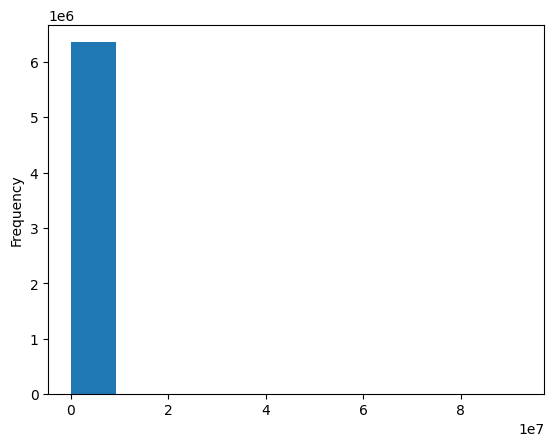

In [17]:
data['amount'].plot(kind = "hist")

<Axes: >

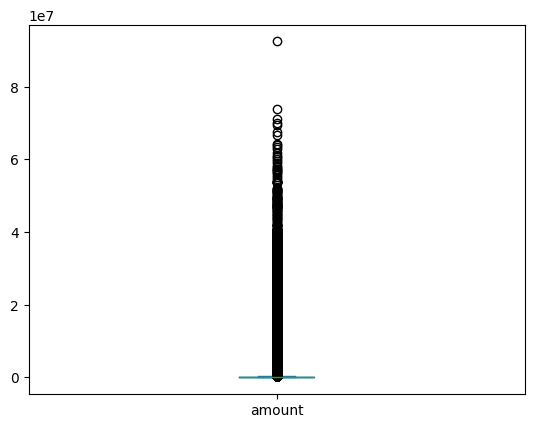

In [18]:
data['amount'].plot(kind = "box")

#### here we can see there is a outlier that is the highest amount of money transfered

In [19]:
data[data['amount'] == 0.00].shape

(16, 11)

#### there is 6 transaction where amount of transaction is 0.00

## for nameOrig column

In [20]:
data['nameOrig'].nunique()

6353307

In [21]:
data[data['nameOrig'].duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
115385,11,PAYMENT,17670.78,C1709295811,488136.00,470465.22,M356415752,0.00,0.00,0,0
146871,12,CASH_IN,127216.34,C44568807,627.00,127843.34,C1768792843,95742.51,0.00,0,0
148517,12,PAYMENT,4611.17,C260230637,228156.00,223544.83,M350428813,0.00,0.00,0,0
196159,13,PAYMENT,2745.21,C745009740,0.00,0.00,M1554169249,0.00,0.00,0,0
208603,13,CASH_OUT,220681.45,C1842781381,70129.00,0.00,C1619574897,0.00,220681.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6359886,715,PAYMENT,3470.96,C876817986,38313.00,34842.04,M2021251796,0.00,0.00,0,0
6360204,715,TRANSFER,118688.81,C1313642079,110425.00,0.00,C927206109,0.00,118688.81,0,0
6360821,717,CASH_OUT,40187.86,C188194996,69491.00,29303.14,C1210630308,679792.78,719980.63,0,0
6361231,717,CASH_OUT,82899.05,C1170262181,253420.00,170520.95,C1991152940,61709.64,144608.69,0,0


#### 
    1. There are 6,353,307 unique transactions.
    2. In comparison, 9,313 users have conducted transactions more than once.

## for oldbalanceOrg column

In [22]:
data['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

**Count:**

    Total number of observations in this column is 6,362,620.
    This suggests no missing values in the column.
    
**Mean:**

    The average value is approximately 833,883.1.
    This indicates that on average, the balances in this column are relatively high, but the presence of high value amount balance
**Standard Deviation (std):**

    The standard deviation is approximately 2,888,243.
    This large value reflects significant variability in the data, suggesting a wide range of values.

**Minimum (min):**

    The smallest value is 0.0.
    This could indicate accounts with no balance or zero transactions, which might need further investigation.

**25th Percentile (25%):**

    The first quartile value is 0.0.
    At least 25% of the data points have a value of 0, suggesting a significant portion of transactions/accounts with no balance or zero activity.

**Median (50%):**

    The median value is 14,208.0.
    This indicates that 50% of the observations are below this value, showing that most balances are lower compared to the mean,

**75th Percentile (75%):**

    The third quartile value is 107,315.2.
    This means that 75% of the observations are below this value, and the top 25% of values are significantly higher.
    
**Maximum (max):**

    The highest value is 59,585,040.
    This extremely large value is a high-value transactions/accounts that need further analysis.

***Key Insights***
    
**Skewness:**
    
    The difference between the mean (833,883.1) and the median (14,208.0) indicates a highly skewed distribution, likely due to presence of extremely high value amounts.

**High Valued Amount:**

    The maximum value (59,585,040) is far larger than the 75th percentile (107,315.2), which highlights the presence of extreme high value amount in someone's account.

**Zero Values:**

    The minimum and 25th percentile values being 0.0 suggest a significant portion of the data has zero balances, which could indicate inactive accounts or zero-balance.


In [23]:
data[data['oldbalanceOrg'] == 0.0].shape

(2102449, 11)

    There are 6 accounts with an old balance of 0.0.
    Transactions are also possible with a zero balance in a credit card system.

In [24]:
data[(data['oldbalanceOrg'] == 0.0) & (data['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,C749981943,0.0,0.0,C667346055,102.00,9291619.62,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.0,0.0,C789014007,11397.00,184477.77,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.0,0.0,C277510102,0.00,970749.68,1,0
77745,10,CASH_OUT,277970.88,C489647033,0.0,0.0,C571514738,0.00,277970.88,1,0
138559,11,TRANSFER,1933920.80,C1706582969,0.0,0.0,C461905695,1283762.85,3217683.65,1,0
169998,12,CASH_OUT,149668.66,C227115333,0.0,0.0,C460735540,44170.11,193838.76,1,0
178668,12,CASH_OUT,222048.71,C265790428,0.0,0.0,C1700442291,2979.00,225027.71,1,0
200845,13,CASH_OUT,454859.39,C1274887619,0.0,0.0,C2146670328,0.00,454859.39,1,0
291459,15,CASH_OUT,95428.32,C947728507,0.0,0.0,C1720721903,0.00,95428.32,1,0
296686,15,CASH_OUT,39713.28,C1404885898,0.0,0.0,C1795377601,1274866.51,1314579.79,1,0


**OldbalanceOrg having a value of 0.0 and isFraud being 1 could be a possible scenario.**

####  Here, we can see that transactions where amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest are all 0.0.

**Why This Transaction is Unlikely**

    Zero amount:
        A transaction with an amount of 0.0 means no money is being transferred, which invalidates the fundamental purpose of a financial transaction.

    No Change in Balances:
        If both the source (oldbalanceOrg and newbalanceOrig) and destination (oldbalanceDest and newbalanceDest) balances remain 0.0, no value exchange has occurred. This is inconsistent with typical transaction behavior.

    Logical Impossibility:
        For a legitimate transaction, either:
        The amount must be non-zero, OR
        The balances of at least one of the accounts (source or destination) should change as a result of the transaction.
    
    Violation of Conservation of Money:
        Financial systems are built to maintain a balance of funds. A transaction must move funds from one account to another or adjust balances accordingly. If all fields are zero, this conservation principle is violated.


In [25]:
data[(data['amount'] == 0.0) & (data['oldbalanceOrg'] == 0.0) & (data['newbalanceOrig'] == 0.0) & (data['oldbalanceDest'] == 0.0) & (data['newbalanceDest'] == 0.0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.0,0.0,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.0,0.0,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.0,0.0,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.0,0.0,1,0
6281485,646,CASH_OUT,0.0,C1997645312,0.0,0.0,C601248796,0.0,0.0,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.0,0.0,C1156763710,0.0,0.0,1,0


#### So These 6 rows are not not logically possible transaction so need to remove these rows

In [26]:
data = data[~((data['amount'] == 0.0) & 
              (data['oldbalanceOrg'] == 0.0) & 
              (data['newbalanceOrig'] == 0.0) & 
              (data['oldbalanceDest'] == 0.0) & 
              (data['newbalanceDest'] == 0.0))]

## Now Overall, the dataset has no issues with consistency, accuracy, validity, or completeness.

In [27]:
data.shape

(6362614, 11)

## for newbalanceOrig column

In [28]:
data['newbalanceOrig'].describe()

count    6.362614e+06
mean     8.551145e+05
std      2.924050e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64


    
    Mean: The average value is 855,114.5. This indicates that, on average, the old balance for the destination account is 855,114.5.
    
    Standard Deviation (std): The standard deviation is 2,924,050, indicating high variability in the balance values.
    
    Minimum (min): The smallest value is 0.0, suggesting that some transactions start with a zero balance in the destination account.
    
    25th Percentile (25%): The value at the 25th percentile is 0.0, meaning that 25% of transactions have a destination balance of 0.0 or lower.
    
    50th Percentile (50%): The median is 0.0, implying that half of the records have a zero balance in the destination account.
    
    75th Percentile (75%): The value at the 75th percentile is 144,258.4, meaning that 75% of transactions have a destination balance of 144,258.4 or lower.
    
    Maximum (max): The maximum value is 49,585,040.7, indicating that some transactions have significantly higher balances in the destination account.
    
    Key Takeaways:
    A significant portion of the transactions involve accounts with a 0.0 balance in the newbalanceOrig account (as shown by the 25th and 50th percentiles). Therefore, we can infer that these transactions attempted to withdraw all the money that the account had.
    

## for nameDest column

In [29]:
data['nameDest'].nunique()

2722359

#### There are 2,722,359 unique destination accounts where the amount was added.

In [30]:
data[data['nameDest'].duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


    These are the accounts where the transaction process occurred more than once.

## for oldbalanceDest column

In [31]:
data['oldbalanceDest'].describe()

count    6.362614e+06
mean     1.100703e+06
std      3.399182e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327068e+05
75%      9.430373e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64



    Mean: The average transaction amount is approximately 1.10 million.
    
    Standard Deviation: The standard deviation of transaction amounts is quite large, approximately 3.40 million, indicating a wide spread of transaction amounts.
    
    Min: The minimum transaction amount is 0. This could be indicative of zero-value transactions.

    25th Percentile: 25% of the transactions have amounts less than or equal to 0.00, indicating a large number of zero transactions.

    50th Percentile (Median): 50% of the transactions have amounts less than or equal to approximately 132,706, indicating the median transaction is relatively low.
    
    75th Percentile: 75% of transactions have amounts less than or equal to approximately 943,037, showing that the majority of transactions fall below this value.
    
    Max: The maximum transaction amount is approximately 356.02 million, indicating some extremely large transactions.


## for newbalanceDest column

In [32]:
data['newbalanceDest'].describe()

count    6.362614e+06
mean     1.224998e+06
std      3.674130e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146618e+05
75%      1.111910e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64



    Mean: The average transaction amount is approximately 1.22 million.

    Standard Deviation: The standard deviation of approximately 3.67 million shows a large variation in transaction amounts, indicating the presence of both low and high-value transactions.
    
    Min: The minimum transaction amount is 0. This suggests there are transactions with zero amounts.

    25th Percentile: 25% of transactions have amounts less than or equal to 0, indicating a significant proportion of transactions are of zero value.
    
    50th Percentile (Median): 50% of the transactions have amounts less than or equal to approximately 214,662, suggesting that half of the transactions are relatively low in value.
    
    75th Percentile: 75% of the transactions have amounts less than or equal to approximately 1.11 million, showing that a large portion of transactions fall below this threshold.
    
    Max: The maximum transaction amount is approximately 356.18 million, indicating that some transactions are extremely large compared to the majority.

## for isFraud column

In [33]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8207
Name: count, dtype: int64

### this shows highly imbalance 

# Bivariate Analysis

<Axes: >

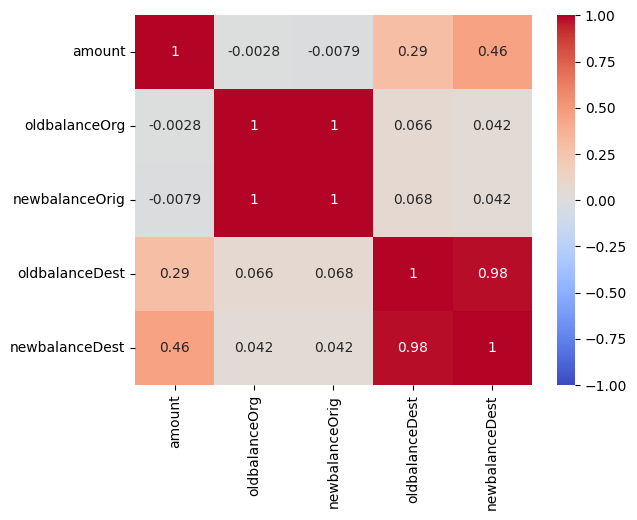

In [34]:
#Correlation Analysis
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                           'oldbalanceDest', 'newbalanceDest']
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', 
                    center=0, vmin=-1, vmax=1)

### here we can see the column oldbalanceOrg and newbalanceOrig are highly correlated and also oldbalanceDest and newbalanceDest are highly correlated if needed then we can remove one of them who are correlated

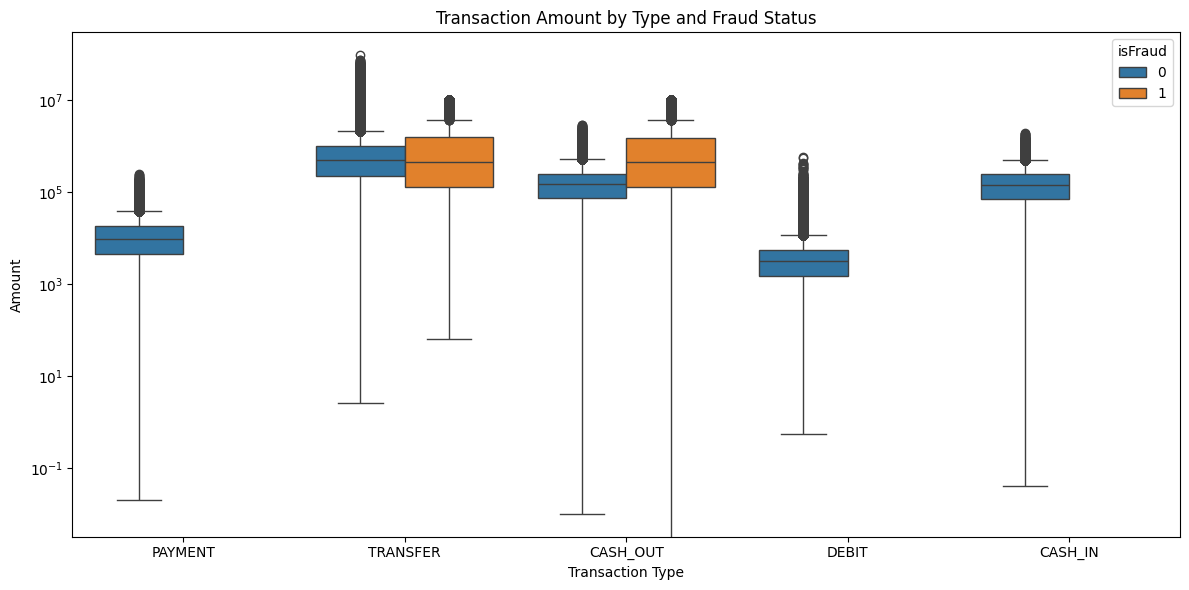

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=data)
plt.title('Transaction Amount by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.yscale('log')
plt.tight_layout()
plt.show()

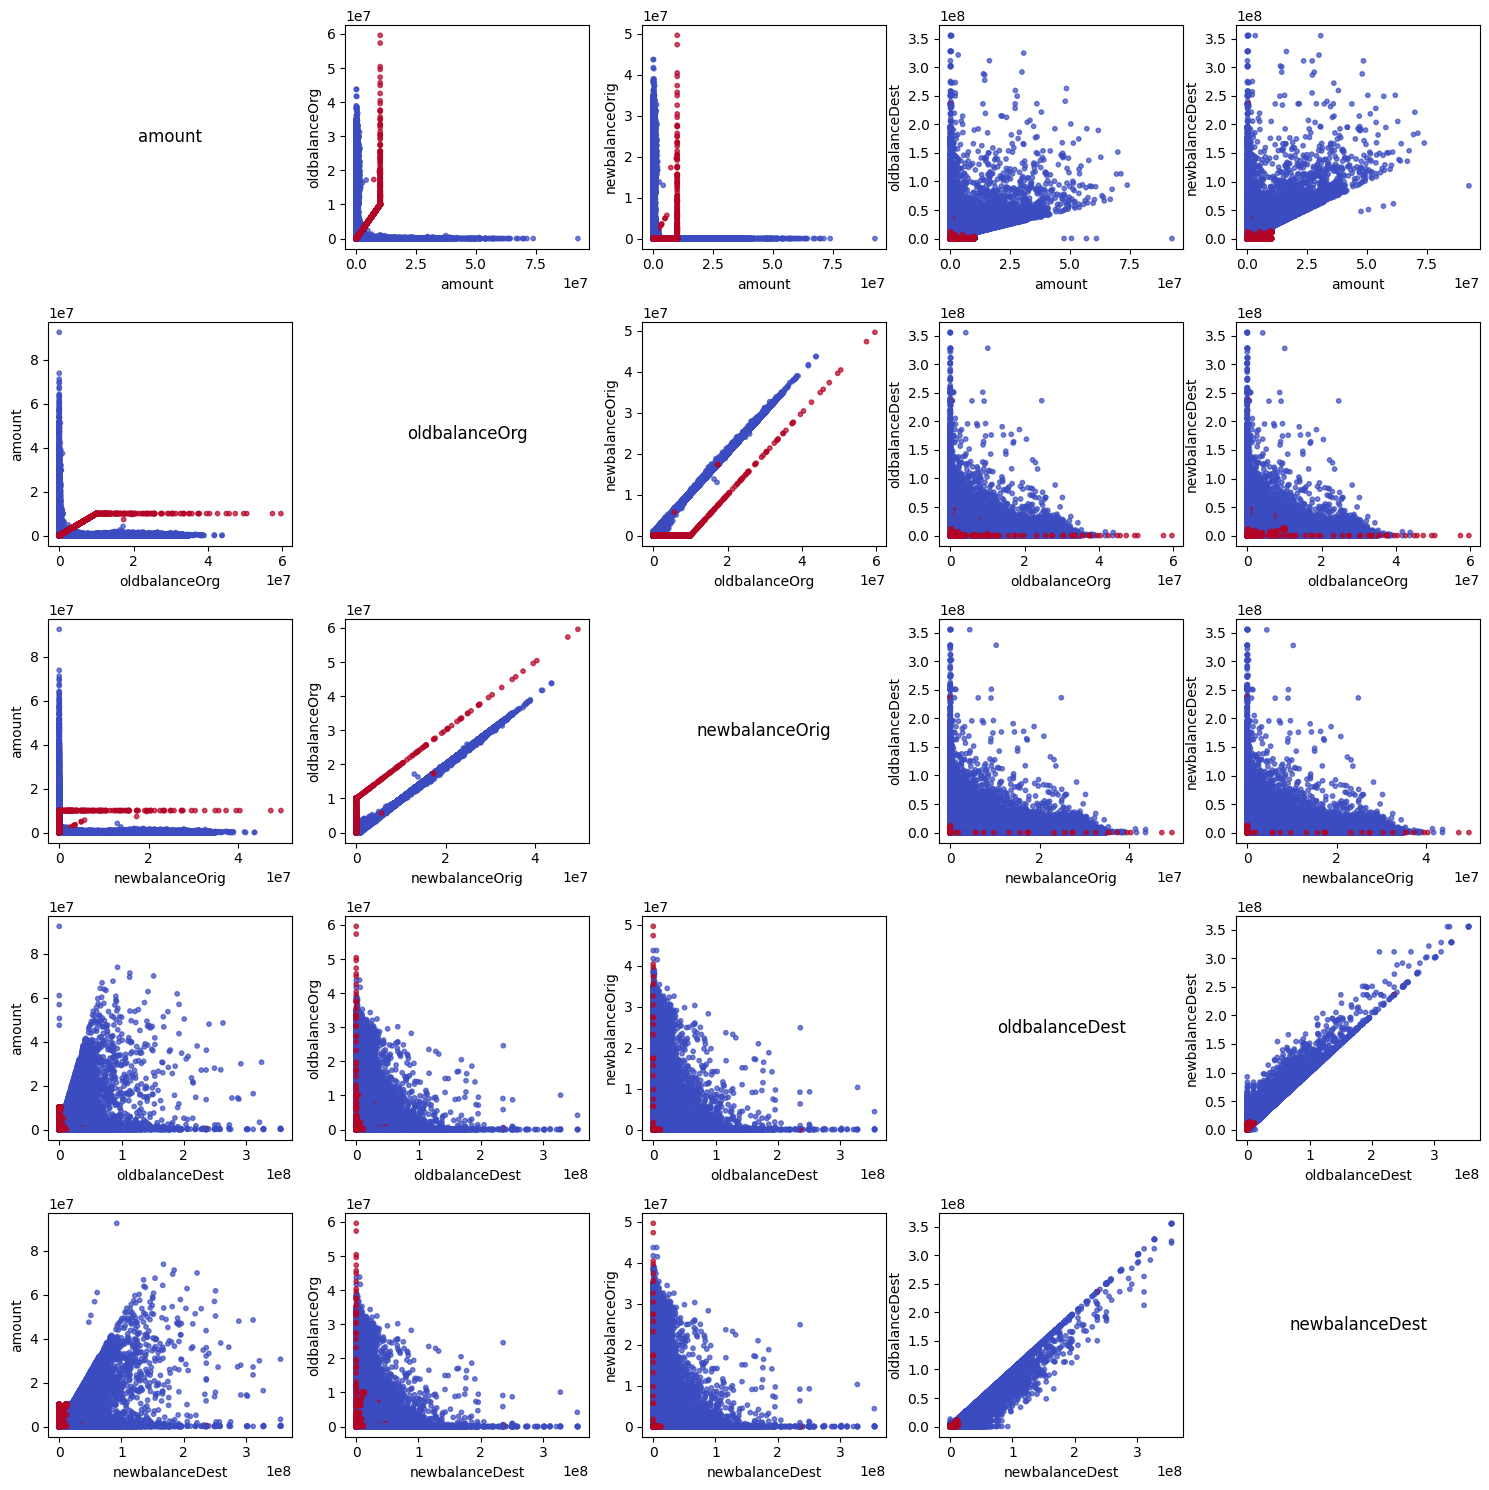

In [36]:
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 
                   'oldbalanceDest', 'newbalanceDest']

fig, axes = plt.subplots(len(numeric_columns), len(numeric_columns), figsize=(15, 15))

for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]
        if i != j:
            ax.scatter(data[col1], data[col2], alpha=0.7, c=data['isFraud'], cmap='coolwarm', s=10)
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
        else:
            ax.text(0.5, 0.5, col1, fontsize=12, ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off()  # Turn off axis for diagonal plots

plt.tight_layout()
plt.show()


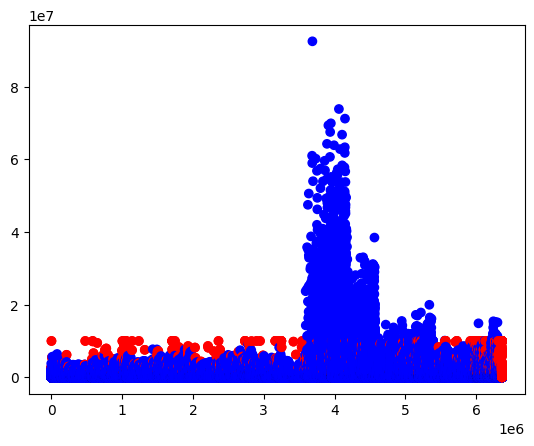

In [37]:
colors = {0: 'blue', 1: 'red'}
plt.scatter(data.index,data['amount'],c = data['isFraud'].map(colors))

### here also we can see the outliers and also those transactions are not fraud as well

In [38]:
without_f = data[data['isFraud'] == 0]
with_f = data[data['isFraud'] == 1]

In [39]:
without_f

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [40]:
with_f

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


<Axes: >

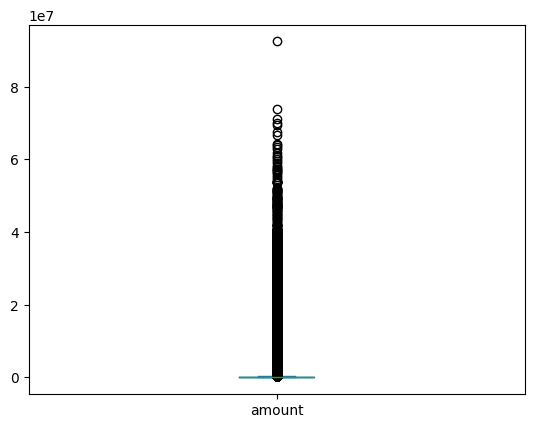

In [41]:
without_f['amount'].plot(kind = 'box')

<Axes: >

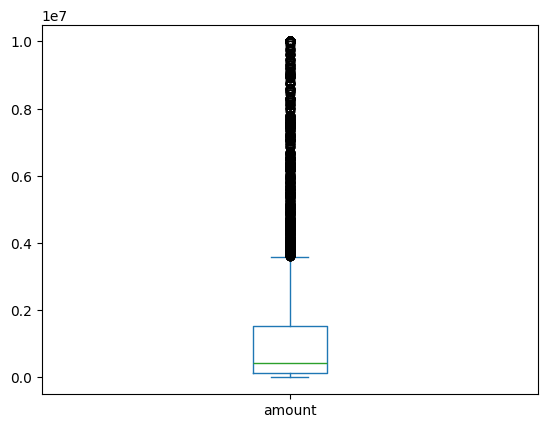

In [42]:
with_f['amount'].plot(kind = 'box')

In [43]:
without_f['amount'].describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [44]:
with_f['amount'].describe()

count    8.207000e+03
mean     1.469041e+06
std      2.404804e+06
min      0.000000e+00
25%      1.271565e+05
50%      4.414456e+05
75%      1.518718e+06
max      1.000000e+07
Name: amount, dtype: float64

### from above observation we can clearly see that we cannot remove outliers using interquartile range
### But we can remove outliers from percentile method on without fraud data because data is highly imbalanced to manage imbalance we can only remove data who are not fraud to balance the data

<Axes: ylabel='Density'>

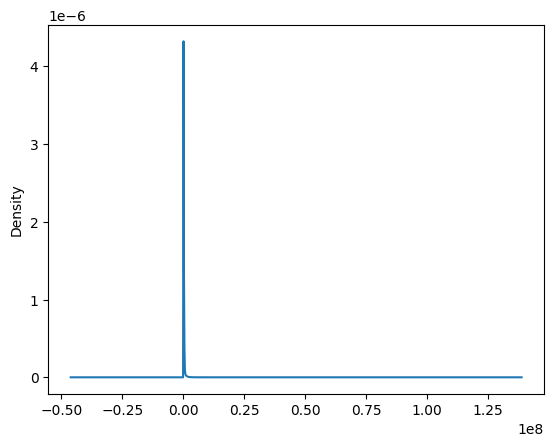

In [45]:
without_f['amount'].plot(kind = 'kde')

<Axes: ylabel='Density'>

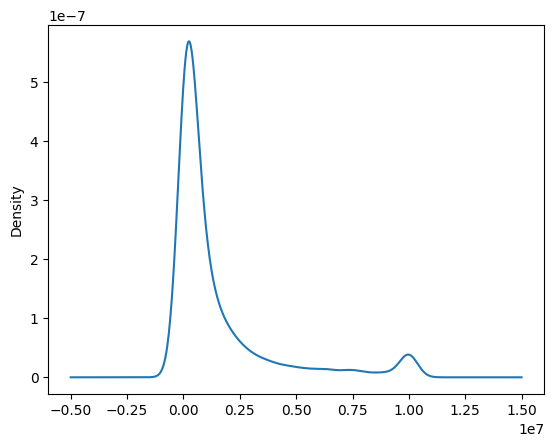

In [46]:
with_f['amount'].plot(kind = 'kde')

In [47]:
upper_limit = without_f['amount'].quantile(0.95)
lower_limit = without_f['amount'].quantile(0.01)
print(upper_limit)
print(lower_limit)

515610.4229999998
449.24


In [48]:
new_without_f = without_f.loc[(without_f['amount']<upper_limit) & (without_f['amount']>lower_limit)]

In [49]:
new_without_f

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [50]:
merged_data = pd.concat([new_without_f, with_f], axis=0, ignore_index=True)

In [51]:
merged_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5981342,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
5981343,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
5981344,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
5981345,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [52]:
# Apply Label Encoding
# !pip install scikit-learn

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_data['type'] = label_encoder.fit_transform(merged_data['type'])

In [53]:
merged_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
3,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
4,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5981342,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
5981343,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
5981344,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
5981345,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [54]:
X = merged_data[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = merged_data[['isFraud']]

In [55]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
3,1,3,7817.71,53860.00,46042.29,0.00,0.00,0
4,1,3,7107.77,183195.00,176087.23,0.00,0.00,0
...,...,...,...,...,...,...,...,...
5981342,743,1,339682.13,339682.13,0.00,0.00,339682.13,0
5981343,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
5981344,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
5981345,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [56]:
y

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
5981342,1
5981343,1
5981344,1
5981345,1


In [57]:
# !pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler

# Applying Random Over Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

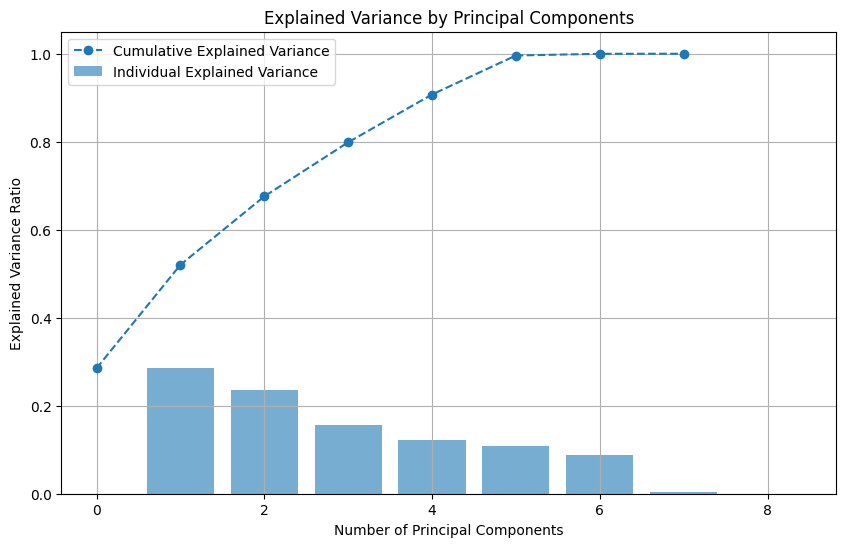

Number of components to retain 95% variance: 6


In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 2: Apply PCA
pca = PCA()  # Initialize PCA (no components specified yet)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Analyze Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.6, label='Individual Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

# Step 4: Choose the Number of Components
# Retain components explaining at least 95% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Re-apply PCA with chosen number of components
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Step 5: Save the Reduced Data
final_X_data = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
final_y_data = y_resampled

In [59]:
# Import necessary libraries
# !pip install xgboost
# !pip install lightgbm

import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress the specific warning
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix


# Define models and hyperparameters
models = {
    # 'XGBoost': XGBClassifier(random_state=42), #use_label_encoder=False,
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=500, random_state=42)
}

# Define hyperparameters for tuning
param_grids = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'solver': ['saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5]
    },
    # 'XGBoost': {
    #     'n_estimators': [100, 200],
    #     'learning_rate': [0.1, 0.01],
    #     'max_depth': [3, 5]
    # },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5]
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Function to perform model training and evaluation
def train_and_evaluate_models(X_train, X_test, y_train, y_test, models, param_grids):
    results = {}
    
    # Loop through models
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Perform hyperparameter tuning using GridSearchCV
        try:
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='accuracy', cv=5, n_jobs=-1)
            grid_search.fit(X_train, y_train)
            
            # Best parameters and score
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
            
            # Evaluate the best model on the test set
            y_pred = best_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Save the results
            results[model_name] = {
                'Best Params': best_params,
                'Best CV Score': best_score,
                'Test Accuracy': accuracy
            }
        except Exception as e:
            print(f"Error with model {model_name}: {str(e)}")
            results[model_name] = {
                'Error': str(e)
            }
    
    return results


X_train, X_test, y_train, y_test = train_test_split(final_X_data, final_y_data, test_size=0.2, random_state=42)

# Train and evaluate all models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test, models, param_grids)
    
# Print the results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    for key, value in result.items():
        print(f"{key}: {value}")

Training Logistic Regression...


/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A colu

Training SVM...


/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A colu

Training Random Forest...


/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vec

Training Gradient Boosting...


/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWar

Training LightGBM...


/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Number of positive: 5246, number of negative: 5259
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10505, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499381 -> initscore=-0.002475
[LightGBM] [Info] Start training from score -0.002475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Number of positive: 5247, number of negative: 5258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10505, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499476 -> initscore=-0.002094
[LightGBM] [Info] Start training from score -0.002094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Number of positive: 5247, number of negative: 5258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10505, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499476 -> initscore=-0.002094
[LightGBM] [Info] Start training from score -0.002094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Number of positive: 5246, number of negative: 5259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10505, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499381 -> initscore=-0.002475
[LightGBM] [Info] Start training from score -0.002475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Number of positive: 5246, number of negative: 5258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10504, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499429 -> initscore=-0.002285
[LightGBM] [Info] Start training from score -0.002285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10504, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499429 -> initscore=-0.002285
[LightGBM] [Info] Start training from score -0.002285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10505, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499476 -> initscore=-0.002094
[LightGBM] [Info] Start training from score -0.002094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 10505, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499476 -> initscore=-0.002094
[LightGBM] [Info] Start training from score -0.002094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMix

[LightGBM] [Info] Number of positive: 6558, number of negative: 6573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 13131, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499429 -> initscore=-0.002285
[LightGBM] [Info] Start training from score -0.002285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A

Training Decision Tree...
Training MLP...


/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/prbhudeb/Desktop/accredian/venv/lib/python3.12/site-packages/


Logistic Regression Results:
Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.8387032141180797
Test Accuracy: 0.8291197075845264

SVM Results:
Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Score: 0.9124216822724701
Test Accuracy: 0.9052695705147731

Random Forest Results:
Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.9361815652151726
Test Accuracy: 0.9262869326835211

Gradient Boosting Results:
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best CV Score: 0.9305463418000024
Test Accuracy: 0.9229363387145904

LightGBM Results:
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best CV Score: 0.9324501174312916
Test Accuracy: 0.9250685348766372

KNN Results:
Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best CV Score: 0.9304702093295039
Test Accuracy: 0.9259823332318002

Decision Tree Results:
Best Params: {'max_dept

In [60]:
def get_best_model(results):
    best_model = None
    highest_accuracy = 0

    # Loop through the results to find the model with the highest test accuracy
    for model_name, result in results.items():
        if result['Test Accuracy'] > highest_accuracy:
            highest_accuracy = result['Test Accuracy']
            best_model = model_name

    return best_model, results[best_model]

# Get the best model
best_model_name, best_model_results = get_best_model(results)

# Print the results for the best model
print(f"Best Model: {best_model_name}")
print(f"Best Params: {best_model_results['Best Params']}")
print(f"Best CV Score: {best_model_results['Best CV Score']}")
print(f"Test Accuracy: {best_model_results['Test Accuracy']}")

Best Model: MLP
Best Params: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best CV Score: 0.9474532297011727
Test Accuracy: 0.9332927200731038


    1. Data cleaning including missing values, outliers and multi-collinearity.
        ==> There was no duplicate and null data but there was 6 rows where column amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest were 0.0 so i just remove them
        ==>There was some outliers on data it can be seen from graph drown for amount column i just remove them by using percentile method
        ==>I checked the correlation between column and oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest are highly correlated

    2. Describe your fraud detection model in elaboration.
        ==>The fraud detection model is aimed at identifying fraudulent activities by analyzing patterns in customer behavior. It is a classification problem where the model predicts whether a transaction or account activity is fraudulent or not.
        ==>Preprocessing: The first step includes cleaning the data (removing missing values, handling outliers), transforming features (e.g., scaling numerical features, encoding categorical variables), and creating new features if necessary.
        ==>Model Selection: I used a Multi-layer Perceptron (MLP) classifier for this task. MLP is a type of neural network that can model complex, non-linear relationships between input features and the target label (fraud or non-fraud).
        ==>Hyperparameter Tuning: The model was fine-tuned using GridSearchCV, which tested different hyperparameters (e.g., hidden layers, activation function, learning rate) to find the best combination for higher accuracy.
        ==>Model Training: The MLP model was trained on the training data, and its performance was evaluated on a holdout test set.

    3. How did you select variables to be included in the model?
        ==> Using correlation matrix and also using Principal component analysis

    4. Demonstrate the performance of the model by using best set of tools.
        ==>Accuracy Score: The overall prediction accuracy is calculated to determine the proportion of correct predictions.
        ==>Cross-Validation: GridSearchCV was used to tune hyperparameters using cross-validation, which ensures that the model’s performance is robust and not overfitting.
        ==>Confusion Matrix: it seems to me bit confusing in this case.

    5. What are the key factors that predict fraudulent customer?
        ==>Transaction amount: Large or unusual transaction amounts could be indicative of fraud.
        ==>Frequency of Transactions: A high frequency of transactions within a short period can be a sign of fraud.

    6. Do these factors make sense? If yes, How? If not, How not?
        ==>Yes, these factors make sense based on domain knowledge and previous research in fraud detection:
        ==>Transaction Amount: High-value transactions are more likely to be flagged for fraud since fraudsters typically attempt high-value transactions.
        ==>Frequency of Transactions: Fraudsters may try to quickly move money or perform multiple transactions to avoid detection.
        ==>These patterns align with how fraud is often perpetrated, making them logical predictors for fraud detection.

    7. What kind of prevention should be adopted while company update its infrastructure?
        ==>When updating infrastructure, companies should adopt several preventive measures to avoid fraud:
        ==>Encryption: Ensure all sensitive data, especially financial transactions, are encrypted both in transit and at rest.
        ==>Behavioral Analysis: Implement continuous monitoring of user behavior and flag deviations from normal patterns, such as sudden changes in transaction volume or frequency.
        ==>Multi-Factor Authentication (MFA): Use MFA to prevent unauthorized access to customer accounts.
        ==>Fraud Detection Systems: Continuously update fraud detection models to account for new fraud patterns.

    8. Assuming these actions have been implemented, how would you determine if they work?
        ==>To determine if the actions have worked:
        ==>Monitoring: Continuously monitor the number of fraudulent transactions after implementing the infrastructure updates. A decrease in fraud cases would indicate success.
        ==>Model Performance: Reassess the fraud detection model's performance (using metrics like accuracy, precision, recall, and AUC). If the model continues to correctly classify fraud cases, it indicates that the infrastructure changes were effective.
        ==>Customer Feedback: Gather feedback from customers to check if they face fewer security issues (e.g., unauthorized transactions) after updates.
        ==>Incident Reports: Track incidents of fraud after the updates. A decrease in fraud reports suggests the effectiveness of the implemented measures.